## Importing the Data

In [4]:
import pandas as pd

In [5]:
raw_df = pd.read_csv("/content/weatherAUS.csv")

In [6]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
px.histogram(raw_df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [11]:
px.histogram(raw_df,
             x='Temp3pm',
             title='Temperature at 3 pm vs. Rain Tomorrow',
             color='RainTomorrow')

In [12]:
px.histogram(raw_df,
             x='RainTomorrow',
             color='RainToday',
             title='Rain Tomorrow vs. Rain Today')

In [13]:
px.scatter(raw_df.sample(2000),
           title='Min Temp. vs Max Temp.',
           x='MinTemp',
           y='MaxTemp',
           color='RainToday')

In [14]:
px.scatter(raw_df.sample(2000),
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [15]:
px.histogram(raw_df,
            x='WindGustSpeed',
            color='RainToday',
            title='Wind Speed and Rain Today')

In [16]:
px.scatter(raw_df,
          x='Pressure9am',
          y='Pressure3pm',
          color='RainTomorrow',
          title='Pressure vs Rain Tomorrow',
          opacity=0.4)

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.
There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the SimpleImputer class from sklearn.impute.
Before imputing it is better to seperate the numerical and categorical columns so that we can deal them seperately. Numerical and Categorical columns will have seperate methods to impute the missing values.

In [17]:
import numpy as np

numeric_cols = raw_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df.select_dtypes('object').columns.tolist()

In [18]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [19]:
categorical_cols


['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [20]:
raw_df[numeric_cols].isna().sum().sort_values(ascending=False)

Sunshine         66805
Evaporation      59694
Cloud3pm         56094
Cloud9am         52625
Pressure3pm      13769
Pressure9am      13743
WindGustSpeed     9105
Humidity3pm       3501
Temp3pm           2624
WindSpeed3pm      2531
Humidity9am       1517
WindSpeed9am      1055
Temp9am            656
MinTemp            468
MaxTemp            307
Rainfall             0
dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')  #This is the easiest way to impute the missing numeric values. Although there are other supriors ways to impute better.

In [22]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [23]:
raw_df[numeric_cols]= imputer.transform(raw_df[numeric_cols])

In [24]:
raw_df[numeric_cols].isna().sum().sort_values(ascending=False)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [25]:
imputercat = SimpleImputer(strategy = 'most_frequent')

In [26]:
raw_df[categorical_cols].isna().sum().sort_values(ascending=False)

WindDir9am      9660
WindGustDir     9163
WindDir3pm      3670
Date               0
Location           0
RainToday          0
RainTomorrow       0
dtype: int64

In [27]:
imputercat.fit(raw_df[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [28]:
raw_df[categorical_cols]= imputercat.transform(raw_df[categorical_cols])

In [29]:
raw_df[categorical_cols].isna().sum().sort_values(ascending=False)

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

Training, Validation and Test Sets¶
While building real-world machine learning models, it is quite common to split the dataset into three parts:

1)Training set - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

2)Validation set - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.

3)Test set - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [32]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


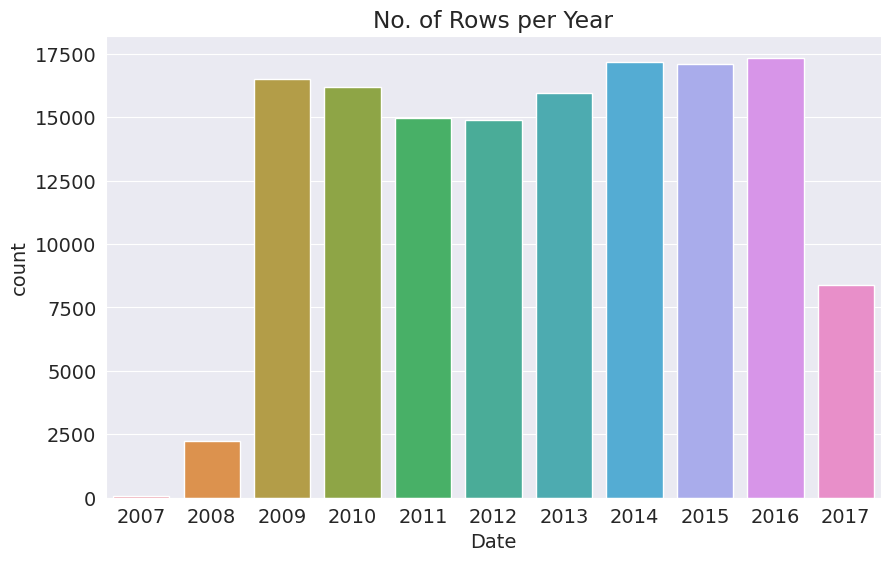

In [33]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [34]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [35]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [36]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.472516   
1       2008-12-02   Albury      7.4     25.1       0.0     5.472516   
2       2008-12-03   Albury     12.9     25.7       0.0     5.472516   
3       2008-12-04   Albury      9.2     28.0       0.0     5.472516   
4       2008-12-05   Albury     17.5     32.3       1.0     5.472516   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0     5.472516   
144549  2014-12-28    Uluru     15.1     36.8       0.0     5.472516   
144550  2014-12-29    Uluru     17.3     37.8       0.0     5.472516   
144551  2014-12-30    Uluru     20.1     38.5       0.0     5.472516   
144552  2014-12-31    Uluru     22.5     39.6       0.0     5.472516   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0        7.63054           W           44.0          W  ...        71.0   
1        7.63054         WNW           44.0        NNW  ...        44.0   
2        7.63054         WSW           46.0          W  ...        38.0   
3        7.63054          NE           24.0         SE  ...        45.0   
4        7.63054           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
144548   7.63054         SSE           43.0        ESE  ...        22.0   
144549   7.63054          NE           31.0        ENE  ...        16.0   
144550   7.63054         ESE           39.0        ESE  ...        15.0   
144551   7.63054         ESE           43.0        ESE  ...        22.0   
144552   7.63054         WNW           76.0        ENE  ...        16.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1  8.000000   4.49925     16.9   
1              25.0       1010.6       1007.8  4.431161   4.49925     17.2   
2              30.0       1007.6       1008.7  4.431161   2.00000     21.0   
3              16.0       1017.6       1012.8  4.431161   4.49925     18.1   
4              33.0       1010.8       1006.0  7.000000   8.00000     17.8   
...             ...          ...          ...       ...       ...      ...   
144548         13.0       1014.1       1009.8  4.431161   4.49925     23.7   
144549          8.0       1012.6       1007.6  4.431161   4.49925     28.9   
144550          8.0       1011.9       1008.0  4.431161   4.49925     29.7   
144551          9.0       1014.0       1009.2  4.431161   4.49925     29.8   
144552          9.0       1012.1       1006.2  4.431161   4.49925     30.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
144548     31.8         No            No  
144549     34.8         No            No  
144550     35.7         No            No  
144551     37.2         No            No  
144552     37.4         No            No  

[97988 rows x 23 columns]

In [37]:
val_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0     5.472516   
2134    2015-01-02   Albury     15.5     39.6       0.0     5.472516   
2135    2015-01-03   Albury     17.1     38.3       0.0     5.472516   
2136    2015-01-04   Albury     26.0     33.1       0.0     5.472516   
2137    2015-01-05   Albury     19.0     35.2       0.0     5.472516   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0     5.472516   
144914  2015-12-28    Uluru     18.0     36.4       0.0     5.472516   
144915  2015-12-29    Uluru     17.5     37.1       0.0     5.472516   
144916  2015-12-30    Uluru     20.0     38.9       0.0     5.472516   
144917  2015-12-31    Uluru     19.3     37.4       0.0     5.472516   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2133     7.63054         WSW           30.0        ESE  ...        45.0   
2134     7.63054          NE           56.0        ESE  ...        45.0   
2135     7.63054         NNE           48.0         NE  ...        35.0   
2136     7.63054         NNE           41.0        ESE  ...        46.0   
2137     7.63054           E           33.0        SSE  ...        60.0   
...          ...         ...            ...        ...  ...         ...   
144913   7.63054           E           52.0        ESE  ...        23.0   
144914   7.63054         ESE           54.0          E  ...        17.0   
144915   7.63054           E           56.0          E  ...        12.0   
144916   7.63054           E           59.0          E  ...        12.0   
144917   7.63054          SE           56.0        ESE  ...        46.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2133           14.0       1013.5       1011.0  4.431161   4.49925     21.0   
2134           12.0       1016.0       1012.4  4.431161   4.49925     25.6   
2135           19.0       1017.9       1012.3  4.431161   4.49925     29.2   
2136           37.0       1013.6       1012.1  8.000000   5.00000     27.4   
2137           34.0       1017.4       1014.7  8.000000   4.49925     25.6   
...             ...          ...          ...       ...       ...      ...   
144913         12.0       1013.2       1010.1  4.431161   4.49925     24.3   
144914          7.0       1014.7       1010.9  4.431161   4.49925     26.7   
144915          7.0       1012.6       1007.5  4.431161   4.49925     28.1   
144916         12.0       1007.2       1002.6  4.431161   1.00000     31.3   
144917         18.0       1007.3       1003.7  4.431161   4.49925     25.8   

        Temp3pm  RainToday  RainTomorrow  
2133       32.7         No            No  
2134       38.2         No            No  
2135       37.0         No            No  
2136       30.9         No            No  
2137       32.5         No            No  
...         ...        ...           ...  
144913     33.0         No            No  
144914     35.0         No            No  
144915     34.7         No            No  
144916     38.4         No            No  
144917     35.8         No            No  

[17089 rows x 23 columns]

In [38]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0     5.472516   
2499    2016-01-02   Albury     20.9     33.6       0.4     5.472516   
2500    2016-01-03   Albury     18.4     23.1       2.2     5.472516   
2501    2016-01-04   Albury     17.3     23.7      15.6     5.472516   
2502    2016-01-05   Albury     15.5     22.9       6.8     5.472516   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.472516   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.472516   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.472516   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.472516   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.472516   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
2498     7.63054         ENE           54.0          N  ...        46.0   
2499     7.63054         SSE           50.0        SSE  ...        54.0   
2500     7.63054         ENE           48.0        ESE  ...        62.0   
2501     7.63054         SSE           39.0         SE  ...        74.0   
2502     7.63054         ENE           31.0         SE  ...        92.0   
...          ...         ...            ...        ...  ...         ...   
145454   7.63054           E           31.0        ESE  ...        59.0   
145455   7.63054           E           31.0         SE  ...        51.0   
145456   7.63054         NNW           22.0         SE  ...        56.0   
145457   7.63054           N           37.0         SE  ...        53.0   
145458   7.63054          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
2498           17.0       1013.4       1009.2  7.000000   3.00000     26.1   
2499           30.0       1011.1       1008.4  8.000000   8.00000     24.8   
2500           67.0       1014.0       1014.8  8.000000   8.00000     21.8   
2501           65.0       1017.9       1016.5  8.000000   8.00000     19.2   
2502           63.0       1016.3       1013.9  8.000000   8.00000     17.2   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2  4.431161   4.49925      9.4   
145455         24.0       1024.6       1020.3  4.431161   4.49925     10.1   
145456         21.0       1023.5       1019.1  4.431161   4.49925     10.9   
145457         24.0       1021.0       1016.8  4.431161   4.49925     12.5   
145458         24.0       1019.4       1016.5  3.000000   2.00000     15.1   

        Temp3pm  RainToday  RainTomorrow  
2498       36.7         No            No  
2499       31.7         No           Yes  
2500       19.5        Yes           Yes  
2501       21.6        Yes           Yes  
2502       22.2        Yes            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[25710 rows x 23 columns]

In [39]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [40]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [41]:
target_col

'RainTomorrow'

In [42]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [43]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [44]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [45]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6     5.472516   7.63054   
1        Albury      7.4     25.1       0.0     5.472516   7.63054   
2        Albury     12.9     25.7       0.0     5.472516   7.63054   
3        Albury      9.2     28.0       0.0     5.472516   7.63054   
4        Albury     17.5     32.3       1.0     5.472516   7.63054   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0     5.472516   7.63054   
144549    Uluru     15.1     36.8       0.0     5.472516   7.63054   
144550    Uluru     17.3     37.8       0.0     5.472516   7.63054   
144551    Uluru     20.1     38.5       0.0     5.472516   7.63054   
144552    Uluru     22.5     39.6       0.0     5.472516   7.63054   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1              WNW           44.0        NNW        WSW  ...          22.0   
2              WSW           46.0          W        WSW  ...          26.0   
3               NE           24.0         SE          E  ...           9.0   
4                W           41.0        ENE         NW  ...          20.0   
...            ...            ...        ...        ...  ...           ...   
144548         SSE           43.0        ESE        SSE  ...          26.0   
144549          NE           31.0        ENE         SW  ...          20.0   
144550         ESE           39.0        ESE        SSE  ...           9.0   
144551         ESE           43.0        ESE        SSW  ...          17.0   
144552         WNW           76.0        ENE        SSW  ...          13.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0              71.0         22.0       1007.7       1007.1  8.000000   
1              44.0         25.0       1010.6       1007.8  4.431161   
2              38.0         30.0       1007.6       1008.7  4.431161   
3              45.0         16.0       1017.6       1012.8  4.431161   
4              82.0         33.0       1010.8       1006.0  7.000000   
...             ...          ...          ...          ...       ...   
144548         22.0         13.0       1014.1       1009.8  4.431161   
144549         16.0          8.0       1012.6       1007.6  4.431161   
144550         15.0          8.0       1011.9       1008.0  4.431161   
144551         22.0          9.0       1014.0       1009.2  4.431161   
144552         16.0          9.0       1012.1       1006.2  4.431161   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
0        4.49925     16.9     21.8         No  
1        4.49925     17.2     24.3         No  
2        2.00000     21.0     23.2         No  
3        4.49925     18.1     26.5         No  
4        8.00000     17.8     29.7         No  
...          ...      ...      ...        ...  
144548   4.49925     23.7     31.8         No  
144549   4.49925     28.9     34.8         No  
144550   4.49925     29.7     35.7         No  
144551   4.49925     29.8     37.2         No  
144552   4.49925     30.1     37.4         No  

[97988 rows x 21 columns]

In [46]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

## Scaling Numeric Features

In [47]:
raw_df[numeric_cols].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       12.184824      23.235120       2.349974       5.472516   
std         6.393226       7.106739       8.465173       3.179313   
min        -8.500000      -4.800000       0.000000       0.000000   
25%         7.600000      17.900000       0.000000       4.000000   
50%        12.000000      22.700000       0.000000       5.472516   
75%        16.800000      28.200000       0.800000       5.472516   
max        33.900000      48.100000     371.000000     145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  140787.00000  140787.000000  140787.000000  140787.000000   
mean        7.63054      39.970520      13.990496      18.631141   
std         2.74139      13.131794       8.852853       8.718653   
min         0.00000       6.000000       0.000000       0.000000   
25%         7.63054      31.000000       7.000000      13.000000   
50%         7.63054      39.000000      13.000000      18.631141   
75%         8.70000      46.000000      19.000000      24.000000   
max        14.50000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140787.000000  140787.000000  140787.000000  140787.000000   
mean       68.826833      51.449288    1017.654577    1015.257963   
std        18.960664      20.546968       6.749189       6.682526   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      51.449288    1017.654577    1015.257963   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  140787.000000  140787.000000  140787.000000  140787.000000  
mean        4.431161       4.499250      16.987066      21.693183  
std         2.284253       2.109458       6.480860       6.872826  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         3.000000       4.000000      12.300000      16.700000  
50%         4.431161       4.499250      16.800000      21.300000  
75%         6.000000       6.000000      21.500000      26.300000  
max         9.000000       9.000000      40.200000      46.700000

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #we can use standard scaler too as we did in our linear regression guide.

In [49]:
scaler.fit(raw_df[numeric_cols]) #also it recommended to fir on the main dataframe and then apply modification to train,val datasets

MinMaxScaler()

In [50]:
MinMaxScaler()

MinMaxScaler()

In [51]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [52]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [53]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [54]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

## Encoding Categorical Data

In [55]:
raw_df=raw_df.iloc[:,1:-1]
categorical_cols = raw_df.select_dtypes('object').columns.tolist()

In [56]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') #'sparse=False' will return an array
                                                               # handle_unknown='ignore' will mark 0 incase of empty values

In [58]:
encoder.fit(raw_df[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [59]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 

In [60]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [61]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-61-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-61-8950d7c1751d>:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-61-8950d7c1751d>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [62]:
pd.set_option('display.max_columns', None)

test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093          N        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [63]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 120)
train_targets: (97988,)
val_inputs: (17089, 120)
val_targets: (17089,)
test_inputs: (25710, 120)
test_targets: (25710,)


## Training a Logistic Regression Mode

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(solver='liblinear') #you can read about 'liblinear' above

In [66]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [67]:
print(model.coef_.tolist())

[[0.8761360074189308, -2.9153610711340034, 3.1811174847966877, 0.8068060776871404, -1.6692211871828007, 6.743567810145321, -0.6793819407215991, -1.4880719447971895, 0.29775555811976806, 6.00625414097153, 5.557234546504096, -9.293919170229302, -0.1630766872138286, 1.2879650812409482, 0.5287927475060238, 2.052755880594935, 0.5978412264821034, -0.33613170808065806, 0.4411627802000826, -0.009969309063082304, 0.3309464135984046, -0.35136362396130266, 0.16521645622006187, 0.43210327516368907, -0.04109161589594413, 0.04235619537109562, 0.25753390474722426, 0.006505128056353839, -0.061442790188742574, -0.49072527045624964, -0.15807675477238178, -0.5906605773765295, -0.8020101755682191, -0.2754693307569399, -0.3205008347405497, -0.5593271955930346, 0.0698592232766265, 0.004594166572641541, 0.06105261060027718, -0.8930135925045912, -0.2891413217509691, -0.0014404438220617594, -0.4636993920541143, -0.4903051883966895, -0.0829782454629943, 0.20858149044567487, 0.4358802361604601, 0.601054024423587

In [68]:
print(model.intercept_)

[-2.43996069]


Making Predictions and Evaluating the Model

In [69]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [70]:
train_preds = model.predict(X_train)

In [71]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [72]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [73]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.94161166, 0.05838834],
       [0.94349266, 0.05650734],
       [0.96211444, 0.03788556],
       ...,
       [0.98712697, 0.01287303],
       [0.98320473, 0.01679527],
       [0.86683101, 0.13316899]])

In [74]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [75]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.8518185900314325